In [1]:
import pickle
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"]=8,8
import scipy.io
import pandas as pd
from scipy import ndimage, misc
from gpx_converter import Converter
import sys
np.set_printoptions(threshold=sys.maxsize)

### Following Code is Relating the Relative Speed calculated using the Pseudo Depth and comparing and verifying it with the Actual Speed data from the GPS of the GoPro

In [2]:
#GH011028.mp4
GH011028_Coordinates_RelativeTest = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/Verification/GH011028_CalculatedTrajectory_Coordinates.csv'
coords_df = pd.read_csv(GH011028_Coordinates_RelativeTest)
Actual_Speed_x = coords_df.x.to_numpy()
Actual_Speed_y = coords_df.y.to_numpy()
Relative_Speed_x = coords_df.x1.to_numpy()
Relative_Speed_y = coords_df.y1.to_numpy()

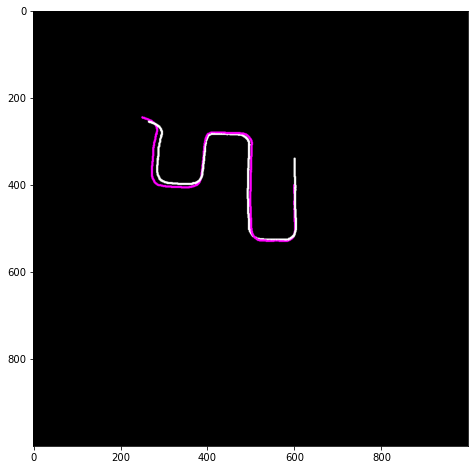

In [3]:
output = np.zeros((1000,1000,3), dtype=np.uint8)
for i in range(0, Actual_Speed_x.shape[0]):
    cv2.circle(output, (int(Actual_Speed_x[i]), int(Actual_Speed_y[i])), 1, (255,0,255), 2)
    cv2.circle(output, (int(Relative_Speed_x[i]*0.66 + 205), int(Relative_Speed_y[i]*.66)+75), 1, (255,255,255), 2)
plt.imshow(output)

In [4]:
#GH011027.mp4
GH011027_Coordinates_RelativeTest = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/Verification/GH011027_CalculatedTrajectory_Coordinates.csv'
coords_df = pd.read_csv(GH011027_Coordinates_RelativeTest)
Actual_Speed_x = coords_df.x.to_numpy()
Actual_Speed_y = coords_df.y.to_numpy()
Relative_Speed_x = coords_df.x1.to_numpy()
Relative_Speed_y = coords_df.y1.to_numpy()

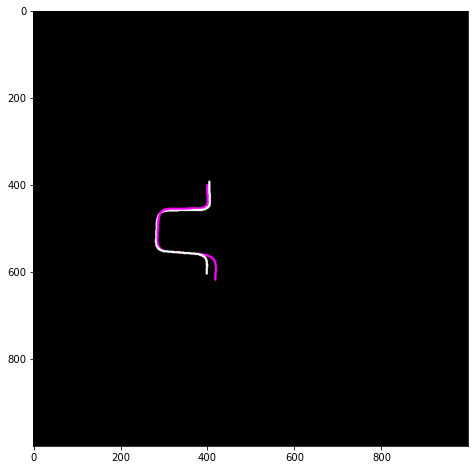

In [5]:
output = np.zeros((1000,1000,3), dtype=np.uint8)
for i in range(0, Actual_Speed_x.shape[0]):
    cv2.circle(output, (int(Actual_Speed_x[i]), int(Actual_Speed_y[i])), 1, (255,0,255), 2)
    cv2.circle(output, (int(Relative_Speed_x[i]*0.57 + 177), int(Relative_Speed_y[i]*0.57)+165), 1, (255,255,255), 2)
plt.imshow(output)

### Following Code is Relating the Calculated Trajectory with the Actual GPS Trajectory from the GoPro

In [6]:
#GPS Files from GoPro
GPX_File_GH011028 = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/Verification/GH011028_1_GPS5.gpx'
GPX_File_GH011027 = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/Verification/GH011027_1_GPS5.gpx'

In [7]:
#GH011028.mp4 Calculated Trajectory
GH011028_Coordinates_RelativeTest = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/Verification/GH011028_CalculatedTrajectory_Coordinates.csv'
coords_df = pd.read_csv(GH011028_Coordinates_RelativeTest)
Relative_Speed_x = coords_df.x1.to_numpy()
Relative_Speed_y = coords_df.y1.to_numpy()

In [8]:
#GPS Coordinates in degrees and converting it to relative X and Y Coordinates
gpx_dic = Converter(input_file=GPX_File_GH011028).gpx_to_dictionary() #Actual GPS Coordinates
gps_lat = np.array(gpx_dic['latitude']) #Latitude and Longitude of Actual GPS Coordinates
gps_long= np.array(gpx_dic['longitude'])

lat_to_y = 6371*np.cos(np.radians(gps_lat))*np.cos(np.radians(gps_long)) #Converting to X Y Coordinates
long_to_x = 6371*np.cos(np.radians(gps_lat))*np.sin(np.radians(gps_long))
lat_to_y_map = abs(lat_to_y + int(abs(min(lat_to_y))))*1000 #Convert to Relative X Y in meters
long_to_x_map = abs(long_to_x + int(abs(min(long_to_x))))*1000   

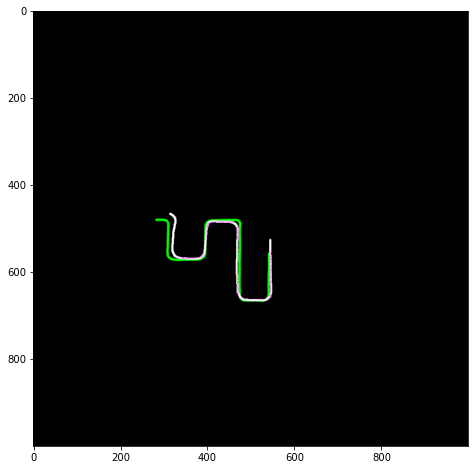

In [18]:
gps_output = np.zeros((1000,1000,3), dtype=np.uint8)
Trajectory_output = np.zeros((1000,1000,3), dtype=np.uint8)
for i in range(0, len(long_to_x_map)):
    cv2.circle(gps_output, (int(long_to_x_map[i]), int(lat_to_y_map[i])), 1, (0,255,0), 2)

    
for i in range(0, Relative_Speed_x.shape[0]):
    cv2.circle(Trajectory_output, (int(Relative_Speed_x[i]*0.47+263), int(Relative_Speed_y[i]*0.49)+330), 1, (255,255,255),2 )
    
gps_output = ndimage.rotate(gps_output, -57, reshape=False)
Overlap = gps_output + Trajectory_output
plt.imshow(Overlap)

In [20]:
#GH011027.mp4 Calculated Trajectory
GH011027_Coordinates_RelativeTest = 'C:/Users/Owen/Desktop/School/ECE_2020_2021/Term 1/ELEC 421/Project/Code/Verification/GH011027_CalculatedTrajectory_Coordinates.csv'
coords_df = pd.read_csv(GH011027_Coordinates_RelativeTest)
Relative_Speed_x = coords_df.x1.to_numpy()
Relative_Speed_y = coords_df.y1.to_numpy()

In [21]:
#GPS Coordinates in degrees and converting it to relative X and Y Coordinates
gpx_dic = Converter(input_file=GPX_File_GH011027).gpx_to_dictionary() #Actual GPS Coordinates
gps_lat = np.array(gpx_dic['latitude']) #Latitude and Longitude of Actual GPS Coordinates
gps_long= np.array(gpx_dic['longitude'])

lat_to_y = 6371*np.cos(np.radians(gps_lat))*np.cos(np.radians(gps_long)) #Converting to X Y Coordinates
long_to_x = 6371*np.cos(np.radians(gps_lat))*np.sin(np.radians(gps_long))
lat_to_y_map = abs(lat_to_y + int(abs(min(lat_to_y))))*1000 #Convert to Relative X Y in meters
long_to_x_map = abs(long_to_x + int(abs(min(long_to_x))))*1000   

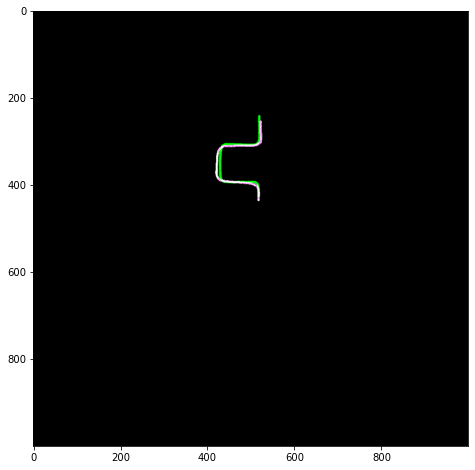

In [22]:
gps_output = np.zeros((1000,1000,3), dtype=np.uint8)
Trajectory_output = np.zeros((1000,1000,3), dtype=np.uint8)
for i in range(0, len(long_to_x_map)):
    cv2.circle(gps_output, (int(long_to_x_map[i]), int(lat_to_y_map[i])), 1, (0,255,0), 2)

    
for i in range(0, Relative_Speed_x.shape[0]):
    cv2.circle(Trajectory_output, (int(Relative_Speed_x[i]*0.47+335), int(Relative_Speed_y[i]*0.49)+58), 1, (255,255,255),2 )
    
gps_output = ndimage.rotate(gps_output, -147, reshape=False)
Overlap = gps_output + Trajectory_output
plt.imshow(Overlap)

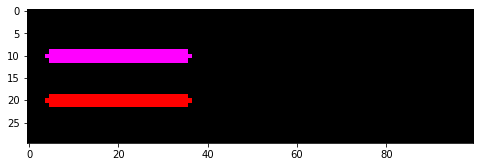

In [24]:
#Creating Legend
Legend = np.zeros((30, 100, 3), dtype=np.uint8)
cv2.line(Legend, (5, 10), (35,10), (255,0,255), 2)

cv2.line(Legend, (5, 20), (35,20), (255,0,0), 2)
plt.imshow(Legend)